<a href="https://colab.research.google.com/github/bireshwar1980/SML/blob/main/LogRDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import linear_model
from google.colab import files
uploaded = files.upload()

Saving insdata.csv to insdata.csv


In [ ]:
df = pd.read_csv("insdata.csv")
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


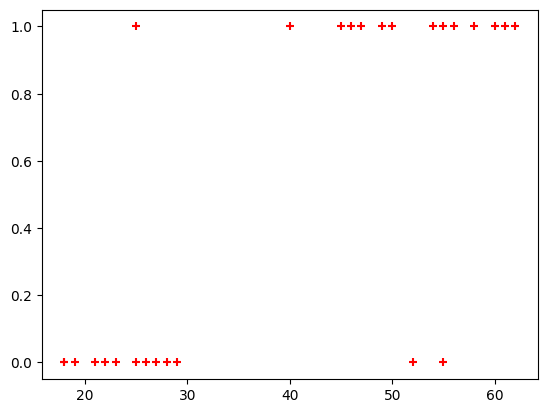

In [ ]:
plt.scatter(df.age,df.bought_insurance,marker='+',color='red')

In [ ]:
newmv_dfx = df.drop(df.columns[[1]],axis = 1)
newmv_dfx

,age
0,22
1,25
2,47
3,52
4,46
5,56
6,55
7,60
8,62
9,61


In [ ]:
newmv_dfy = df.drop(df.columns[[0]],axis = 1)
newmv_dfy

,bought_insurance
0,0
1,0
2,1
3,0
4,1
5,1
6,0
7,1
8,1
9,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['age']],df.bought_insurance,train_size=0.8)

In [ ]:
newmv_dfx_train, newmv_dfx_test, newmv_dfy_train, newmv_dfy_test = train_test_split(newmv_dfx, newmv_dfy, test_size=0.2, random_state=0)

In [ ]:
X_train


,age
13,29
12,27
3,52
7,60
11,28
24,50
21,26
0,22
6,55
4,46


In [ ]:
X_test

,age
19,18
20,21
14,49
1,25
10,18
2,47


In [ ]:
y_train

13    0
12    0
3     0
7     1
11    0
24    1
21    0
0     0
6     0
4     1
25    1
9     1
22    1
8     1
26    0
18    0
23    1
15    1
17    1
5     1
16    1
Name: bought_insurance, dtype: int64

In [ ]:
y_test

19    0
20    0
14    1
1     0
10    0
2     1
Name: bought_insurance, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model.fit(newmv_dfx_train,newmv_dfy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted

array([0, 0, 1, 0, 0, 1])

In [ ]:
model.predict_proba(X_test)

array([[0.9302622 , 0.0697378 ],
       [0.90501595, 0.09498405],
       [0.2918862 , 0.7081138 ],
       [0.85882961, 0.14117039],
       [0.9302622 , 0.0697378 ],
       [0.34030833, 0.65969167]])

In [ ]:
Y_predicted = model.predict(newmv_dfx_test)

In [ ]:
Y_predicted

array([1, 1, 1, 1, 1, 0])

In [ ]:
K= newmv_dfx_test.values

In [ ]:
K

array([[47],
       [50],
       [49],
       [58],
       [56],
       [28]])

In [ ]:
model.predict_proba(K)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.34030833, 0.65969167],
       [0.26925593, 0.73074407],
       [0.2918862 , 0.7081138 ],
       [0.13059794, 0.86940206],
       [0.15824269, 0.84175731],
       [0.81292397, 0.18707603]])

In [ ]:
model.predict_proba(newmv_dfx_test)

array([[0.34030833, 0.65969167],
       [0.26925593, 0.73074407],
       [0.2918862 , 0.7081138 ],
       [0.13059794, 0.86940206],
       [0.15824269, 0.84175731],
       [0.81292397, 0.18707603]])

In [ ]:
X_test['Predicted bought_insurance']=y_predicted
X_test

,age,Predicted bought_insurance
19,18,0
20,21,0
14,49,1
1,25,0
10,18,0
2,47,1


In [ ]:
newmv_dfx_test['Predicted bought_insurance']=Y_predicted

In [ ]:
newmv_dfx_test

,age,Predicted bought_insurance
2,47,1
24,50,1
14,49,1
17,58,1
5,56,1
11,28,0


In [ ]:
X_test['Actual bought_insurance']=y_test
X_test

,age,Predicted bought_insurance,Actual bought_insurance
19,18,0,0
20,21,0,0
14,49,1,1
1,25,0,0
10,18,0,0
2,47,1,1


In [ ]:
newmv_dfx_test['Actual bought_insurance']=newmv_dfy_test

In [ ]:
newmv_dfx_test

,age,Predicted bought_insurance,Actual bought_insurance
2,47,1,1
24,50,1,1
14,49,1,1
17,58,1,1
5,56,1,1
11,28,0,0


In [ ]:
model.predict([[5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.predict([[95]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
model.coef_

array([[0.11216016]])

In [ ]:
model.intercept_

array([-4.60960684])

In [ ]:
import math
def sigmoid(x):
  return 1 / (1 + math.exp(-x))

In [ ]:
def prediction_function(age):
    z = 0.11 * age - 4.61 # 0.11216016 ~ 0.11 and -4.60960684 ~ -4.61
    y = sigmoid(z)
    return y

In [ ]:
age = 35
prediction_function(age)

0.31864626621097436

In [ ]:
age = 43
prediction_function(age)

0.5299640517645717